In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 125)
pd.set_option('display.max_rows', 122)

In [3]:
appln = pd.read_csv('application_data.csv')
appln

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Finding shape of appln
appln.shape

(307511, 122)

In [5]:
# Finding data types of various columns
appln.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [6]:
# checking missing values
appln.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
#dropping columns having missing values > than 50 %
appln.drop(appln.columns[appln.isnull().sum()/appln.shape[0]>0.5].tolist(), axis = 1, inplace =True)
appln.shape

(307511, 81)

In [8]:
appln.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [9]:
#creating another dataframe(temporary) having columns with null values < 13%

appln_13 = appln[appln.columns[appln.isnull().sum()/appln.shape[0]<0.13].tolist()]
appln_13.shape

(307511, 65)

In [10]:
appln_13.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

Columns having null values < 13% 
- AMT_ANNUITY                         
- AMT_GOODS_PRICE                  
- NAME_TYPE_SUITE                  
- CNT_FAM_MEMBERS                  
- EXT_SOURCE_2                     
- OBS_30_CNT_SOCIAL_CIRCLE         
- DEF_30_CNT_SOCIAL_CIRCLE         
- OBS_60_CNT_SOCIAL_CIRCLE         
- DEF_60_CNT_SOCIAL_CIRCLE         
- DAYS_LAST_PHONE_CHANGE           


In [11]:
# Data Correction
# finding number of unique values in the column to check whether the column is continuous or categorical

appln_13.nunique().sort_values()

REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_20                    2
FLAG_EMAIL                          2
FLAG_DOCUMEN

#### Measures to take for handling missing values < 13%

##### Continuous Variables:
1. AMT_ANNUITY: Impute with median value, i.e., 10791.0.
2. AMT_GOODS_PRICE: Impute with median value, i.e., 270000.0.
3. EXT_SOURCE_2 : Impute with mean value, i.e., 0.51.
4. DAYS_LAST_PHONE_CHANGE: Impute with median value, i.e., -757.0

##### Categorical Variables: 
For the categorical variables listed below we can impute the missing values with most frequently occuring value.
1. NAME_TYPE_SUITE
2. CNT_FAM_MEMBERS
3. OBS_30_CNT_SOCIAL_CIRCLE
4. DEF_30_CNT_SOCIAL_CIRCLE
5. OBS_30_CNT_SOCIAL_CIRCLE
6. DEF_30_CNT_SOCIAL_CIRCLE

10791.0

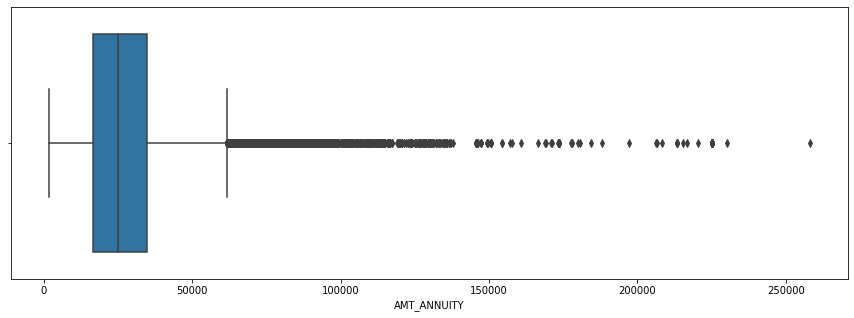

In [12]:
import statistics as s
plt.figure(figsize = [15,5])
sns.boxplot(appln.AMT_ANNUITY)
s.median(appln.AMT_ANNUITY)

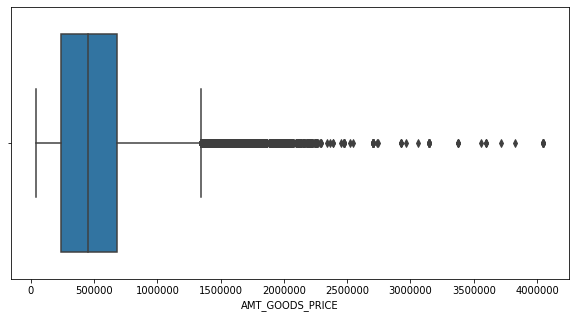

In [13]:
plt.figure(figsize = [10,5])
sns.boxplot(appln.AMT_GOODS_PRICE)

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

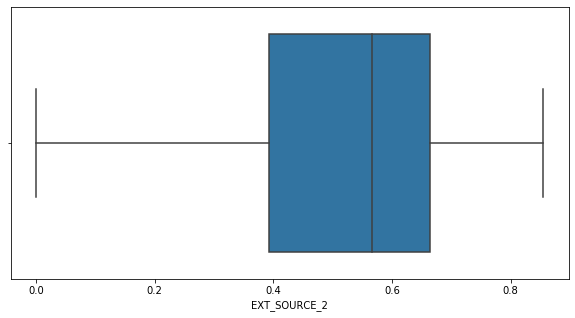

In [14]:
plt.figure(figsize = [10,5])
sns.boxplot(appln.EXT_SOURCE_2)
appln.EXT_SOURCE_2.describe()

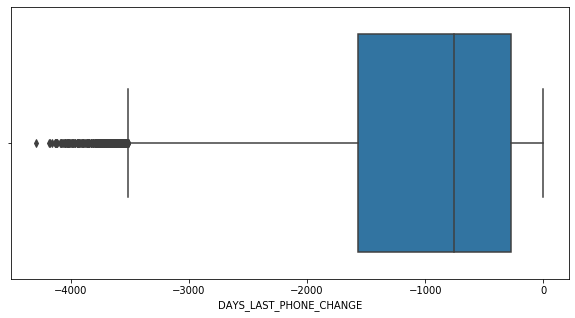

In [15]:
plt.figure(figsize = [10,5])
sns.boxplot(appln.DAYS_LAST_PHONE_CHANGE)

### Checking datatypes of all columns and changing the data types.

In [16]:
#checking data types
appln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [17]:
#changing the data types of columns

int_obj = ['TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 
           'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
           'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

for i in appln.columns:
    if i in int_obj:
        appln[i] = appln[i].astype('object')

appln.DAYS_REGISTRATION = appln.DAYS_REGISTRATION.astype('int')

In [18]:
appln.CNT_FAM_MEMBERS = pd.to_numeric(appln.CNT_FAM_MEMBERS, errors = 'coerce')

In [19]:
abs_values = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

for i in appln.columns:
    if i in abs_values:
        appln[i] = appln[i].abs()

In [20]:
appln.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
appln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  object 
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

## Checking for outliers in numerical columns and drawing inferences (min 5columns)

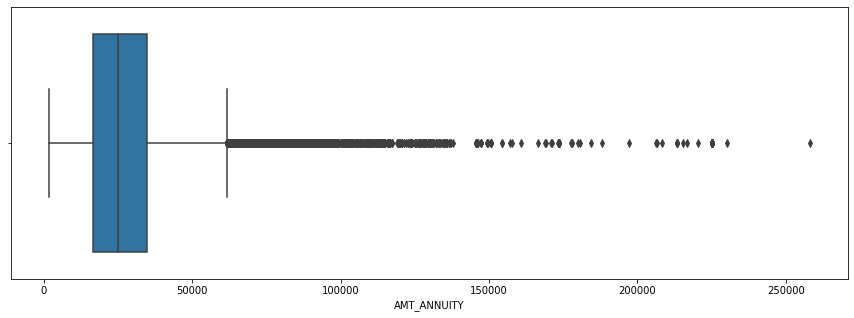

In [22]:
# AMT_ANNUITY
plt.figure(figsize = [15,5])
sns.boxplot(appln.AMT_ANNUITY)

`Inferences:` The IQR is small. It looks like there are many data points at the upper fence of the boxplot. The chunk of outliers can be handled with the binning method and one data point which is after 250000 can be deleted.

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

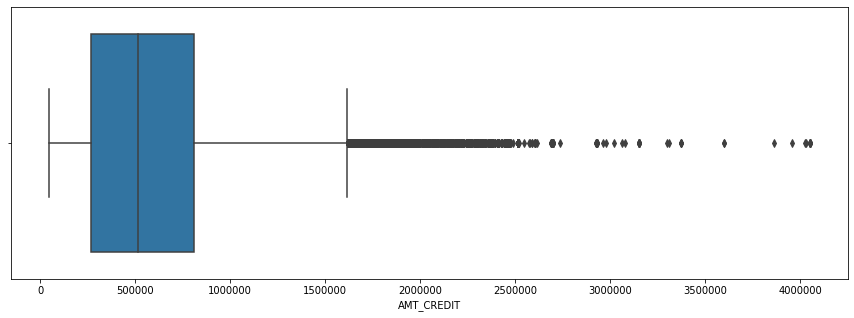

In [23]:
#AMT_CREDIT
plt.figure(figsize = [15,5])
sns.boxplot(appln.AMT_CREDIT)
appln.AMT_CREDIT.describe()

`Inferences:` The IQR is between 270000.00 and 808650.00. There are many data points at the upper fence of the boxplot which can be handled with the binning method.

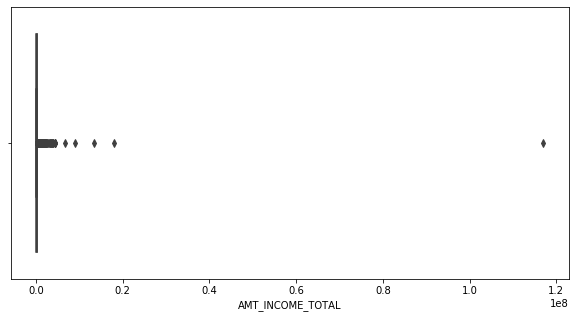

In [24]:
# AMT_INCOME_TOTAL
plt.figure(figsize = [10,5])
sns.boxplot(appln.AMT_INCOME_TOTAL)

`Inferences:` One exceptional outlier present around 1.2 has to be deleted as it effect the analysis. 

In [25]:
pd.set_option('display.float_format', '{:.2f}'.format)
appln.AMT_INCOME_TOTAL.describe()

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
25%        112500.00
50%        147150.00
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

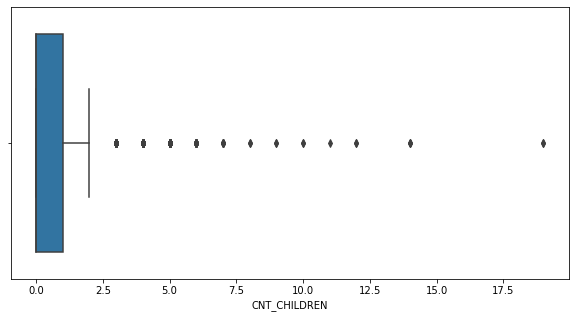

In [26]:
# CNT_CHILDREN
plt.figure(figsize = [10,5])
sns.boxplot(appln.CNT_CHILDREN)


`Inferences:` To handle outliers we can use capping method.

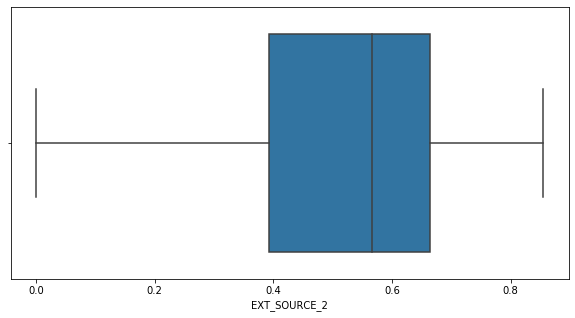

In [27]:
plt.figure(figsize = [10,5])
sns.boxplot(appln.EXT_SOURCE_2)

`Inferences:` There are no outliers in the plot.

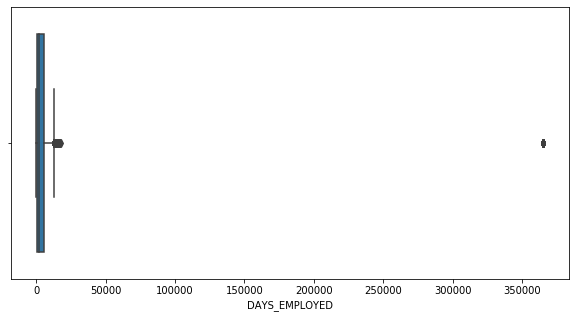

In [28]:
plt.figure(figsize = [10,5])
sns.boxplot(appln.DAYS_EMPLOYED)

`Inferences:` The outlier present after 350000 has to be deleted.

### Binning: Converting Continuous Variables into Categorical Variables (at least 2).

In [29]:
appln['AMT_INCOME_TOTAL_CAT'] = pd.cut(appln.AMT_INCOME_TOTAL, [26100, 112500 , 144000 , 202500 , 13500000 ], 
                                       labels = ['low','medium','high','very_high'])
               

In [30]:
appln['REGION_POPULATION_RELATIVE_CAT'] = pd.cut(appln.REGION_POPULATION_RELATIVE, [0.0, 0.02, 0.04, 0.07], 
                                       labels = ['Sparsely_Populated','Average','Heavily_Populated'])

In [31]:
appln['AMT_CREDIT_CAT'] = pd.cut(appln.AMT_CREDIT, [45000, 400000, 900000, 2000000, 4050000], 
                                       labels = ['Low_Crdt','Average_Crdt','High_Crdt', 'Very_High_Crdt'])

#### Choosing 20-30 columns for further analysis

1. SK_ID_CURR
2. TARGET
3. NAME_CONTRACT_TYPE
4. CODE_GENDER
5. FLAG_OWN_CAR
6. FLAG_OWN_REALTY
7. CNT_CHILDREN
8. AMT_INCOME_TOTAL
9. NAME_INCOME_TYPE
10. NAME_EDUCATION_TYPE
11. NAME_FAMILY_STATUS
12. NAME_HOUSING_TYPE
13. DAYS_EMPLOYED
14. DAYS_BIRTH
15. AMT_CREDIT
16. AMT_ANNUITY
17. AMT_GOODS_PRICE
18. FLAG_MOBILE
19. FLAG_PHONE
20. FLAG_EMAIL
21. OCCUPATION_TYPE
22. CNT_FAM_MEMEBERS
23. ORGANIZATION_TYPE
24. OBS_30_CNT_SOCIAL_CIRCLE
25. DEF_30_CNT_SOCIAL_CIRCLE
26. OBS_60_CNT_SOCIAL_CIRCLE
27. DEF_60_CNT_SOCIAL_CIRCLE

### Analysis

In [32]:
# Creating new dataframe after choosing 27 columns

new_appln =appln[['SK_ID_CURR',
                  'TARGET',
                  'NAME_CONTRACT_TYPE',
                  'CODE_GENDER',
                  'FLAG_OWN_CAR',
                  'FLAG_OWN_REALTY',
                  'CNT_CHILDREN',
                  'AMT_INCOME_TOTAL',
                  'NAME_INCOME_TYPE',
                  'NAME_EDUCATION_TYPE',
                  'NAME_FAMILY_STATUS',
                  'NAME_HOUSING_TYPE',
                  'DAYS_EMPLOYED',
                  'DAYS_BIRTH',
                  'AMT_CREDIT',
                  'AMT_ANNUITY',
                  'AMT_GOODS_PRICE',
                  'FLAG_MOBIL',
                  'FLAG_PHONE',
                  'FLAG_EMAIL',
                  'OCCUPATION_TYPE',
                  'CNT_FAM_MEMBERS',
                  'ORGANIZATION_TYPE',
                  'OBS_30_CNT_SOCIAL_CIRCLE',
                  'DEF_30_CNT_SOCIAL_CIRCLE',
                  'OBS_60_CNT_SOCIAL_CIRCLE',
                  'DEF_60_CNT_SOCIAL_CIRCLE']]

new_appln.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,M,N,Y,0,202500.00,Working,Secondary / secondary special,Single / not married,House / apartment,637,9461,406597.50,24700.50,351000.00,1,1,0,Laborers,1.00,Business Entity Type 3,2.00,2.00,2.00,2.00
1,100003,0,Cash loans,F,N,N,0,270000.00,State servant,Higher education,Married,House / apartment,1188,16765,1293502.50,35698.50,1129500.00,1,1,0,Core staff,2.00,School,1.00,0.00,1.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,Working,Secondary / secondary special,Single / not married,House / apartment,225,19046,135000.00,6750.00,135000.00,1,1,0,Laborers,1.00,Government,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,3039,19005,312682.50,29686.50,297000.00,1,0,0,Laborers,2.00,Business Entity Type 3,2.00,0.00,2.00,0.00
4,100007,0,Cash loans,M,N,Y,0,121500.00,Working,Secondary / secondary special,Single / not married,House / apartment,3038,19932,513000.00,21865.50,513000.00,1,0,0,Core staff,1.00,Religion,0.00,0.00,0.00,0.00


In [33]:
# Checking Imbalance percentage.

100*new_appln.TARGET.value_counts(normalize = True)

0   91.93
1    8.07
Name: TARGET, dtype: float64

##### `Inferences:` TARGET variable is an imbalance variable.

In [34]:
appln_TARGET1 = new_appln[new_appln['TARGET'] == 1]
appln_TARGET0 = new_appln[new_appln['TARGET'] == 0]

In [35]:
appln_TARGET1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,M,N,Y,0,202500.00,Working,Secondary / secondary special,Single / not married,House / apartment,637,9461,406597.50,24700.50,351000.00,1,1,0,Laborers,1.00,Business Entity Type 3,2.00,2.00,2.00,2.00
26,100031,1,Cash loans,F,N,Y,0,112500.00,Working,Secondary / secondary special,Widow,House / apartment,2628,18724,979992.00,27076.50,702000.00,1,0,0,Cooking staff,1.00,Business Entity Type 3,10.00,1.00,10.00,0.00
40,100047,1,Cash loans,M,N,Y,0,202500.00,Commercial associate,Secondary / secondary special,Married,House / apartment,1262,17482,1193580.00,35028.00,855000.00,1,0,0,Laborers,2.00,Business Entity Type 3,0.00,0.00,0.00,0.00
42,100049,1,Cash loans,F,N,N,0,135000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,3597,13384,288873.00,16258.50,238500.00,1,1,0,Sales staff,2.00,Self-employed,1.00,0.00,1.00,0.00
81,100096,1,Cash loans,F,N,Y,0,81000.00,Pensioner,Secondary / secondary special,Married,House / apartment,365243,24794,252000.00,14593.50,252000.00,1,0,0,NaN,2.00,XNA,1.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.00,Working,Secondary / secondary special,Married,House / apartment,3048,9918,450000.00,32746.50,450000.00,1,0,0,Laborers,3.00,Business Entity Type 3,0.00,0.00,0.00,0.00
307475,456215,1,Cash loans,F,N,N,1,144000.00,Working,Higher education,Civil marriage,House / apartment,2405,13416,1303200.00,46809.00,1125000.00,1,0,0,Laborers,3.00,Construction,0.00,0.00,0.00,0.00
307481,456225,1,Cash loans,M,N,Y,0,225000.00,Working,Secondary / secondary special,Married,House / apartment,3147,20644,297000.00,19975.50,297000.00,1,1,0,Managers,2.00,Business Entity Type 3,0.00,0.00,0.00,0.00
307489,456233,1,Cash loans,F,N,Y,0,225000.00,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,286,16471,521280.00,23089.50,450000.00,1,0,0,Sales staff,2.00,Business Entity Type 3,1.00,1.00,1.00,0.00


In [36]:
appln_TARGET0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
1,100003,0,Cash loans,F,N,N,0,270000.00,State servant,Higher education,Married,House / apartment,1188,16765,1293502.50,35698.50,1129500.00,1,1,0,Core staff,2.00,School,1.00,0.00,1.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,Working,Secondary / secondary special,Single / not married,House / apartment,225,19046,135000.00,6750.00,135000.00,1,1,0,Laborers,1.00,Government,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,3039,19005,312682.50,29686.50,297000.00,1,0,0,Laborers,2.00,Business Entity Type 3,2.00,0.00,2.00,0.00
4,100007,0,Cash loans,M,N,Y,0,121500.00,Working,Secondary / secondary special,Single / not married,House / apartment,3038,19932,513000.00,21865.50,513000.00,1,0,0,Core staff,1.00,Religion,0.00,0.00,0.00,0.00
5,100008,0,Cash loans,M,N,Y,0,99000.00,State servant,Secondary / secondary special,Married,House / apartment,1588,16941,490495.50,27517.50,454500.00,1,1,0,Laborers,2.00,Other,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.00,Pensioner,Secondary / secondary special,Single / not married,House / apartment,365243,24384,225000.00,22050.00,225000.00,1,1,0,NaN,1.00,XNA,0.00,0.00,0.00,0.00
307506,456251,0,Cash loans,M,N,N,0,157500.00,Working,Secondary / secondary special,Separated,With parents,236,9327,254700.00,27558.00,225000.00,1,0,0,Sales staff,1.00,Services,0.00,0.00,0.00,0.00
307507,456252,0,Cash loans,F,N,Y,0,72000.00,Pensioner,Secondary / secondary special,Widow,House / apartment,365243,20775,269550.00,12001.50,225000.00,1,1,0,NaN,1.00,XNA,0.00,0.00,0.00,0.00
307508,456253,0,Cash loans,F,N,Y,0,153000.00,Working,Higher education,Separated,House / apartment,7921,14966,677664.00,29979.00,585000.00,1,0,1,Managers,1.00,School,6.00,0.00,6.00,0.00


In [90]:
# Correlation for final_df_TARGET1

corr = appln_TARGET1.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace  = True)
corr_df['Correlation_abs'] = corr_df['Correlation'].abs()
corr_df.sort_values("Correlation_abs", ascending = False, inplace = True)
corr_df.head(10).reset_index()

,index,Var1,Var2,Correlation,Correlation_abs
0,152,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00,1.00
1,96,AMT_GOODS_PRICE,AMT_CREDIT,0.98,0.98
2,105,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89,0.89
3,166,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87,0.87
4,97,AMT_GOODS_PRICE,AMT_ANNUITY,0.75,0.75
5,83,AMT_ANNUITY,AMT_CREDIT,0.75,0.75
6,55,DAYS_BIRTH,DAYS_EMPLOYED,0.58,0.58
7,153,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.34,0.34
8,139,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.33,0.33
9,167,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.26,0.26


In [91]:
# Correlation for appln_TARGET0

corr = appln_TARGET0.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace  = True)
corr_df['Correlation_abs'] = corr_df['Correlation'].abs()
corr_df.sort_values("Correlation_abs", ascending = False, inplace = True)
corr_df.head(10).reset_index()

,index,Var1,Var2,Correlation,Correlation_abs
0,152,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00,1.00
1,96,AMT_GOODS_PRICE,AMT_CREDIT,0.99,0.99
2,105,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88,0.88
3,166,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86,0.86
4,97,AMT_GOODS_PRICE,AMT_ANNUITY,0.78,0.78
5,83,AMT_ANNUITY,AMT_CREDIT,0.77,0.77
6,55,DAYS_BIRTH,DAYS_EMPLOYED,0.63,0.63
7,80,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42,0.42
8,93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35,0.35
9,67,AMT_CREDIT,AMT_INCOME_TOTAL,0.34,0.34


`Inferences`: The correlation are more or less same for the varibales upto the 7th row in both dataframes, but the remaining rows has different parameters in both data frames.i.e., appln_TARGET1 and appln_TARGET0.

### Univariate Analysis: Continuous (5 variables)

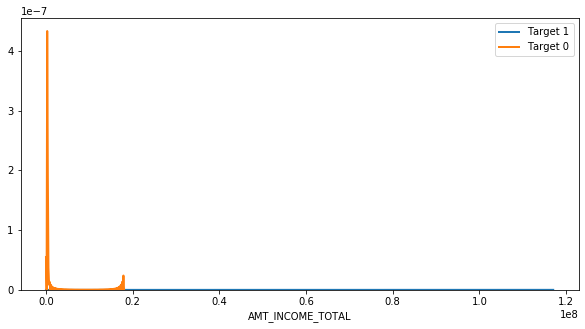

In [94]:
#analysis for Total Income
plt.figure(figsize = [10,5])
sns.distplot(appln_TARGET1['AMT_INCOME_TOTAL'], hist= False , label = 'Target 1',kde_kws=dict(linewidth=2))
sns.distplot(appln_TARGET0['AMT_INCOME_TOTAL'], hist= False , label = 'Target 0',kde_kws=dict(linewidth=2))


In [40]:
appln_TARGET1.AMT_INCOME_TOTAL.describe()

count       24825.00
mean       165611.76
std        746676.96
min         25650.00
25%        112500.00
50%        135000.00
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [41]:
appln_TARGET0.AMT_INCOME_TOTAL.describe()

count     282686.00
mean      169077.72
std       110476.27
min        25650.00
25%       112500.00
50%       148500.00
75%       202500.00
max     18000090.00
Name: AMT_INCOME_TOTAL, dtype: float64

`Inferences`: From the graph, it is evident that the no. of customers paying loan on time is more with TARGET=0 than TARGET=1.

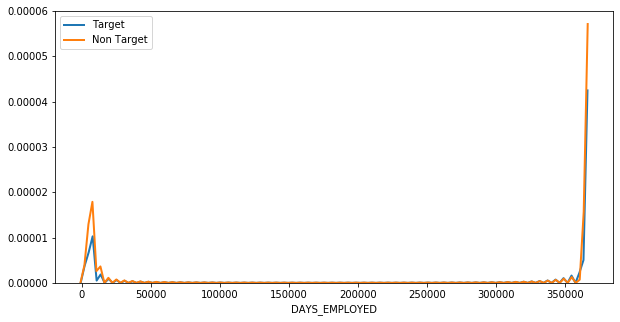

In [42]:
#analysis for Days Employed
plt.figure(figsize = [10,5])
sns.distplot(appln_TARGET1['DAYS_EMPLOYED'], hist= False , label = 'Target',kde_kws=dict(linewidth=2))
sns.distplot(appln_TARGET0['DAYS_EMPLOYED'], hist= False , label = 'Non Target',kde_kws=dict(linewidth=2))

In [43]:
appln_TARGET0.DAYS_EMPLOYED.describe()

count   282686.00
mean     69668.81
std     140983.36
min          0.00
25%        967.00
50%       2304.00
75%       6074.00
max     365243.00
Name: DAYS_EMPLOYED, dtype: float64

`Inferences:` The pattern is same for both the TARGET's. The sudden jump in the plot around 350000 indicates an outlier.

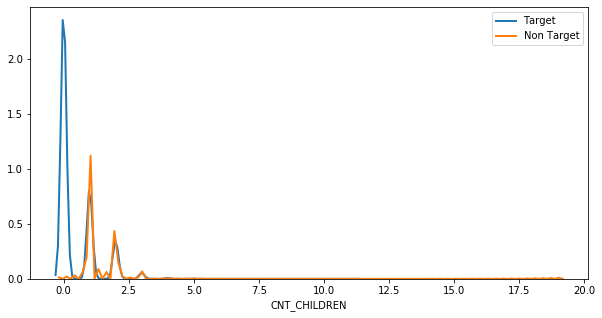

In [92]:
#analysis for CNT_CHILDREN
plt.figure(figsize = [10,5])
sns.distplot(appln_TARGET1['CNT_CHILDREN'], hist= False , label = 'Target',kde_kws=dict(linewidth=2))
sns.distplot(appln_TARGET0['CNT_CHILDREN'], hist= False , label = 'Non Target',kde_kws=dict(linewidth=2))

`Inference:` CNT_CHILDREN attribute should not effect with respect to loan payement as most defaulters have no children which is shown by the blue spike at 0.0.

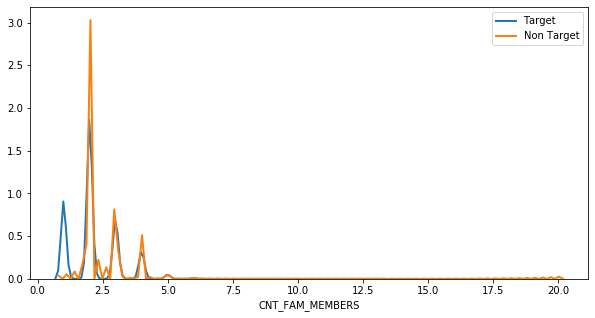

In [44]:
#analysis for CNT_FAM_MEMBERS
plt.figure(figsize = [10,5])
sns.distplot(appln_TARGET1['CNT_FAM_MEMBERS'], hist= False , label = 'Target',kde_kws=dict(linewidth=2))
sns.distplot(appln_TARGET0['CNT_FAM_MEMBERS'], hist= False , label = 'Non Target',kde_kws=dict(linewidth=2))

`Inference:` No insights can be drawn as the pattern for both targets looks same.

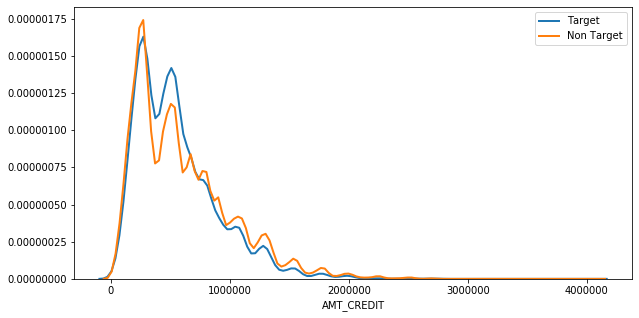

In [45]:
#analysis for Amount Credit
plt.figure(figsize = [10,5])
sns.distplot(appln_TARGET1['AMT_CREDIT'], hist= False , label = 'Target',kde_kws=dict(linewidth=2))
sns.distplot(appln_TARGET0['AMT_CREDIT'], hist= False , label = 'Non Target',kde_kws=dict(linewidth=2))

`Inference:` The pattern is same but the 2nd spike is more for TARGET than NON TARGET indicating that the credit amount taken TARGET customers is more than NON TARGET.

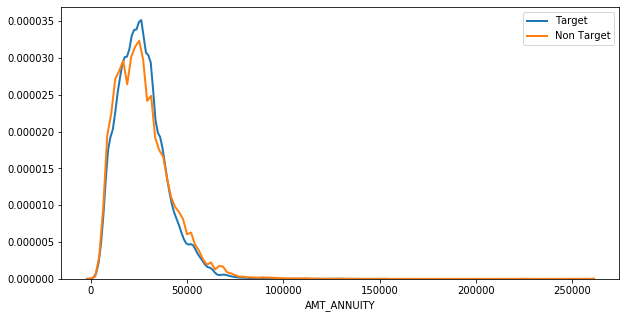

In [46]:
#analysis for AMT_ANNUITY

plt.figure(figsize = [10,5])
sns.distplot(appln_TARGET1['AMT_ANNUITY'], hist= False , label = 'Target',kde_kws=dict(linewidth=2))
sns.distplot(appln_TARGET0['AMT_ANNUITY'], hist= False , label = 'Non Target',kde_kws=dict(linewidth=2))

`Inference:` Though the pattern is same but the AMT_ANNUITY is slightly more for TARGET than NON TARGET customers indicated by spike.

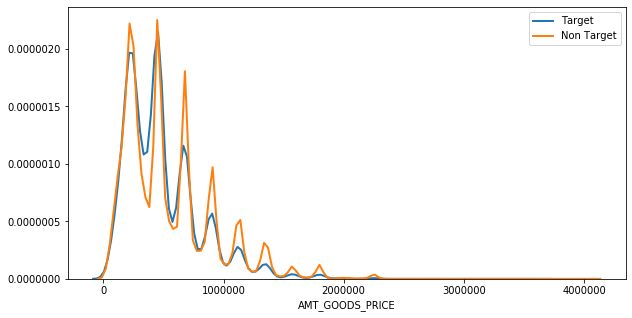

In [47]:
#analysis for AMT_GOODS_PRICE

plt.figure(figsize = [10,5])
sns.distplot(appln_TARGET1['AMT_GOODS_PRICE'], hist= False , label = 'Target',kde_kws=dict(linewidth=2))
sns.distplot(appln_TARGET0['AMT_GOODS_PRICE'], hist= False , label = 'Non Target',kde_kws=dict(linewidth=2))

`Inference:` No insights can be drawn as the pattern for both targets looks same.

### Univariate Analysis: Categorical (5 variables)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

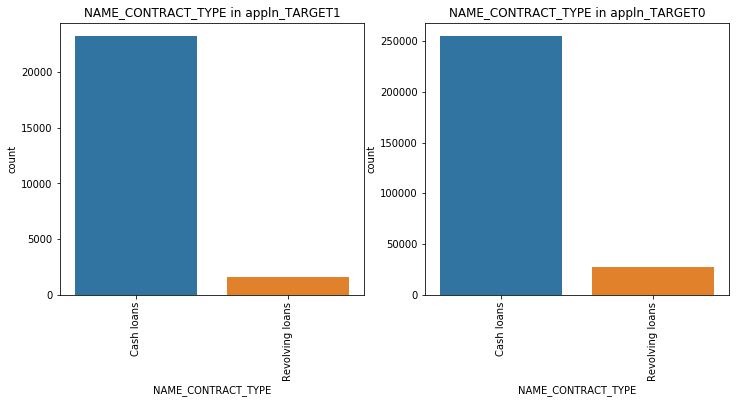

In [48]:
# NAME_CONTRACT_TYPE
plt.figure(figsize = [12,5])
plt.subplot(1,2,1)
sns.countplot(appln_TARGET1.NAME_CONTRACT_TYPE)
plt.title('NAME_CONTRACT_TYPE in appln_TARGET1')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(appln_TARGET0.NAME_CONTRACT_TYPE)
plt.title('NAME_CONTRACT_TYPE in appln_TARGET0')
plt.xticks(rotation=90)

`Inferences:` The Cash Loans and Revolving Loans are more for TARGET=0 than TARGET=1.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

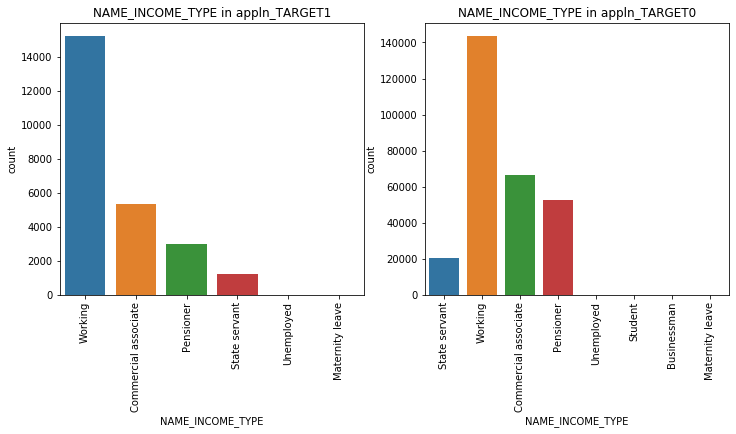

In [49]:
# NAME_INCOME_TYPE
plt.figure(figsize = [12,5])
plt.subplot(1,2,1)
sns.countplot(appln_TARGET1.NAME_INCOME_TYPE)
plt.title('NAME_INCOME_TYPE in appln_TARGET1')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(appln_TARGET0.NAME_INCOME_TYPE)
plt.title('NAME_INCOME_TYPE in appln_TARGET0')
plt.xticks(rotation=90)


`Inferences:` The number of people employed in a particular category is more for TARGET=0 than TARGET=1.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

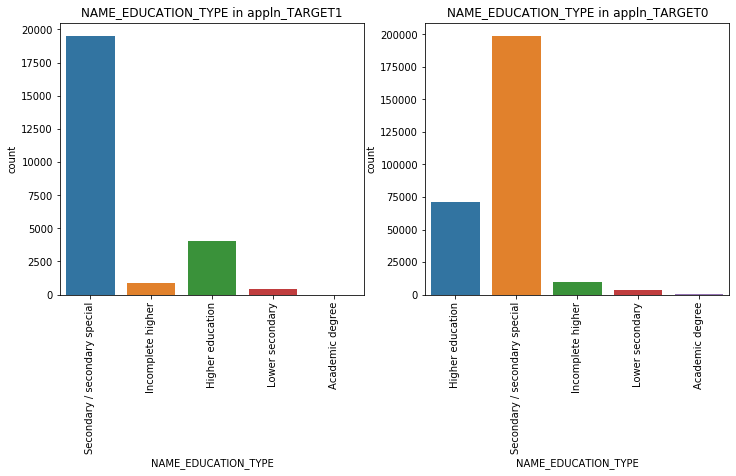

In [50]:
# NAME_EDUCATION_TYPE
plt.figure(figsize = [12,5])
plt.subplot(1,2,1)
sns.countplot(appln_TARGET1.NAME_EDUCATION_TYPE)
plt.title('NAME_EDUCATION_TYPE in appln_TARGET1')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(appln_TARGET0.NAME_EDUCATION_TYPE)
plt.title('NAME_EDUCATION_TYPE in appln_TARGET0')
plt.xticks(rotation=90)

`Inferences:` The number of people educated in a particular category is more for TARGET=0 than TARGET=1.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

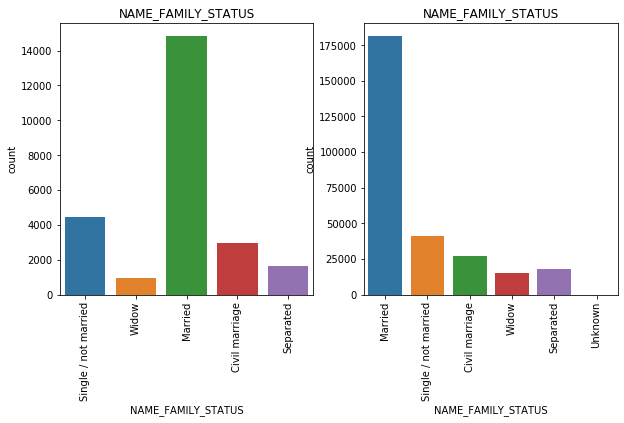

In [51]:
# NAME_FAMILY_STATUS
plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
sns.countplot(appln_TARGET1.NAME_FAMILY_STATUS)
plt.title('NAME_FAMILY_STATUS')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(appln_TARGET0.NAME_FAMILY_STATUS)
plt.title('NAME_FAMILY_STATUS')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

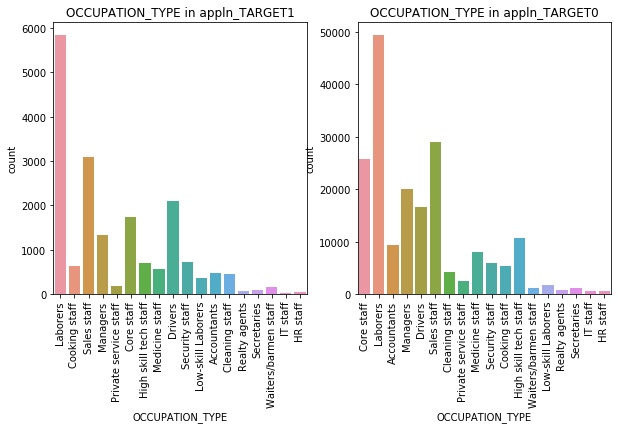

In [52]:
# OCCUPATION_TYPE
plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
sns.countplot(appln_TARGET1.OCCUPATION_TYPE)
plt.title('OCCUPATION_TYPE in appln_TARGET1')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(appln_TARGET0.OCCUPATION_TYPE)
plt.title('OCCUPATION_TYPE in appln_TARGET0')
plt.xticks(rotation=90)

In [98]:
appln_TARGET1.OCCUPATION_TYPE.value_counts(normalize = True)

Laborers                0.31
Sales staff             0.17
Drivers                 0.11
Core staff              0.09
Managers                0.07
Security staff          0.04
High skill tech staff   0.04
Cooking staff           0.03
Medicine staff          0.03
Accountants             0.03
Cleaning staff          0.02
Low-skill Laborers      0.02
Private service staff   0.01
Waiters/barmen staff    0.01
Secretaries             0.00
Realty agents           0.00
HR staff                0.00
IT staff                0.00
Name: OCCUPATION_TYPE, dtype: float64

In [99]:
appln_TARGET0.OCCUPATION_TYPE.value_counts(normalize = True)

Laborers                0.26
Sales staff             0.15
Core staff              0.13
Managers                0.10
Drivers                 0.09
High skill tech staff   0.06
Accountants             0.05
Medicine staff          0.04
Security staff          0.03
Cooking staff           0.03
Cleaning staff          0.02
Private service staff   0.01
Low-skill Laborers      0.01
Secretaries             0.01
Waiters/barmen staff    0.01
Realty agents           0.00
HR staff                0.00
IT staff                0.00
Name: OCCUPATION_TYPE, dtype: float64

`Inference:` The percentage of Laborers in TARGET=1 i.e., 31% is more than TARGET=0 i.e., 26%.

`Inferences:` Overall, as the number of rows are more in appln_TARGET0 than in appln_TARGET1, the count in each of the univariate analysis is more in TARGET0 than TARGET1 but the pattern for all 5 variable analysis is more or less same.

### Bivariate Analysis: Continuous-Continuous (5 variables)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]),
 <a list of 8 Text xticklabel objects>)

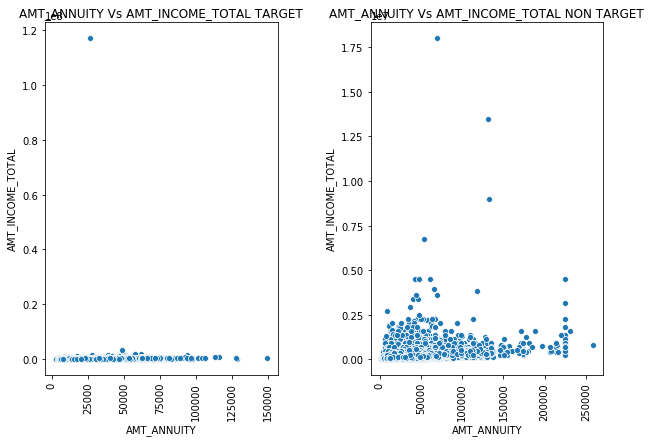

In [101]:
#analysis of AMT_ANNUITY Vs AMT_INCOME_TOTAL

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
plt.subplot(1,2,1)
sns.scatterplot(x = appln_TARGET1['AMT_ANNUITY'],y = appln_TARGET1['AMT_INCOME_TOTAL'])
plt.title("AMT_ANNUITY Vs AMT_INCOME_TOTAL TARGET")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.scatterplot(x = appln_TARGET0['AMT_ANNUITY'],y = appln_TARGET0['AMT_INCOME_TOTAL'])
plt.title("AMT_ANNUITY Vs AMT_INCOME_TOTAL NON TARGET")
plt.xticks(rotation=90)

`Inferences:` 
1. As it can be seen from the plot for TARGET, the income of customers is not so good as the values are around 0.0xle8 and AMT_ANNUITY value is spread across the complete range.
2. Whereas for NON TARGET, the income of the customers is spread across 0.00xle7 to 0.25xle7

So from these above two inferences it can be said that, as the customers income is less they are finding difficult in paying the loan amount on time. Also, this might be the reason that the correlation between these variables was not present in top ten of the correlation dataframe that we had found earlier.

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.]),
 <a list of 7 Text xticklabel objects>)

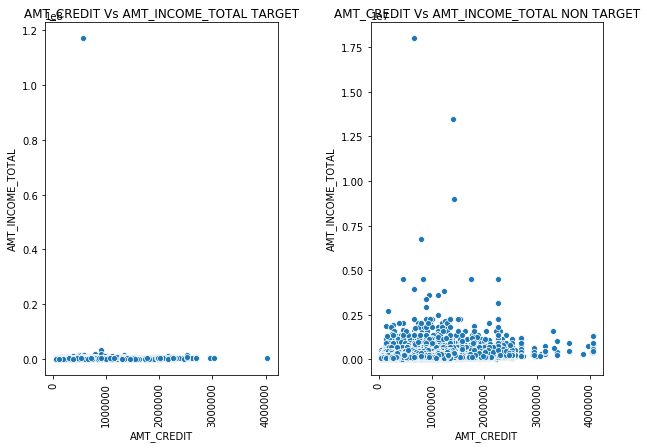

In [102]:
#analysis of AMT_CREDIT Vs AMT_INCOME_TOTAL

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
plt.subplot(1,2,1)
sns.scatterplot(x = appln_TARGET1['AMT_CREDIT'],y = appln_TARGET1['AMT_INCOME_TOTAL'])
plt.title("AMT_CREDIT Vs AMT_INCOME_TOTAL TARGET")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.scatterplot(x = appln_TARGET0['AMT_CREDIT'],y = appln_TARGET0['AMT_INCOME_TOTAL'])
plt.title("AMT_CREDIT Vs AMT_INCOME_TOTAL NON TARGET")
plt.xticks(rotation=90)

`Inferences:` The plot looks similar to the plot of AMT_ANNUITY vs AMT_INCOME_TOTAL. Here also, the TARGET customers having low income have taken credit amount of upto 2 to 3 lakhs.

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]),
 <a list of 8 Text xticklabel objects>)

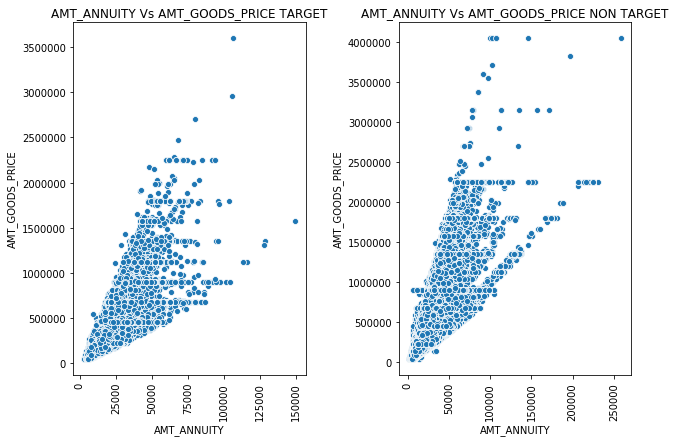

In [53]:
#analysis of AMT_ANNUITY Vs AMT_GOODS_PRICE

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
plt.subplot(1,2,1)
sns.scatterplot(x = appln_TARGET1['AMT_ANNUITY'],y = appln_TARGET1['AMT_GOODS_PRICE'])
plt.title("AMT_ANNUITY Vs AMT_GOODS_PRICE TARGET")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.scatterplot(x = appln_TARGET0['AMT_ANNUITY'],y = appln_TARGET0['AMT_GOODS_PRICE'])
plt.title("AMT_ANNUITY Vs AMT_GOODS_PRICE NON TARGET")
plt.xticks(rotation=90)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]),
 <a list of 8 Text xticklabel objects>)

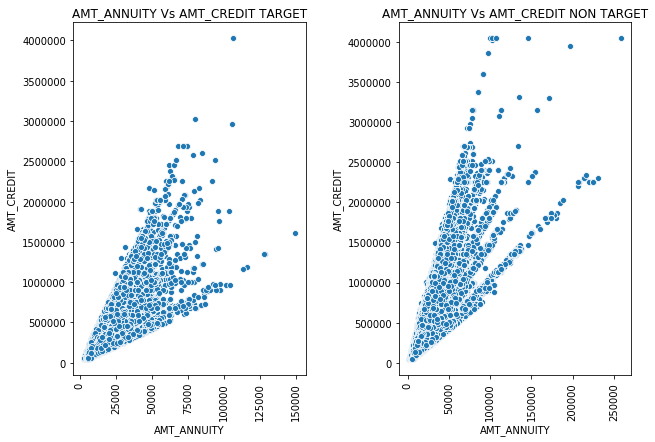

In [54]:
#analysis of AMT_ANNUITY Vs AMT_CREDIT

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.scatterplot(x = appln_TARGET1['AMT_ANNUITY'],y = appln_TARGET1['AMT_CREDIT'])
plt.title("AMT_ANNUITY Vs AMT_CREDIT TARGET")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.scatterplot(x = appln_TARGET0['AMT_ANNUITY'],y = appln_TARGET0['AMT_CREDIT'])
plt.title("AMT_ANNUITY Vs AMT_CREDIT NON TARGET")
plt.xticks(rotation=90)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]),
 <a list of 8 Text xticklabel objects>)

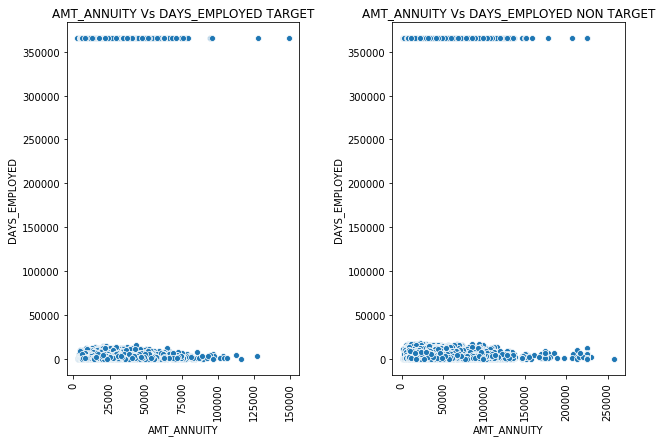

In [55]:
#analysis of AMT_ANNUITY Vs DAYS_EMPLOYED

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.scatterplot(x = appln_TARGET1['AMT_ANNUITY'],y = appln_TARGET1['DAYS_EMPLOYED'])
plt.title("AMT_ANNUITY Vs DAYS_EMPLOYED TARGET")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.scatterplot(x = appln_TARGET0['AMT_ANNUITY'],y = appln_TARGET0['DAYS_EMPLOYED'])
plt.title("AMT_ANNUITY Vs DAYS_EMPLOYED NON TARGET")
plt.xticks(rotation=90)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.]),
 <a list of 6 Text xticklabel objects>)

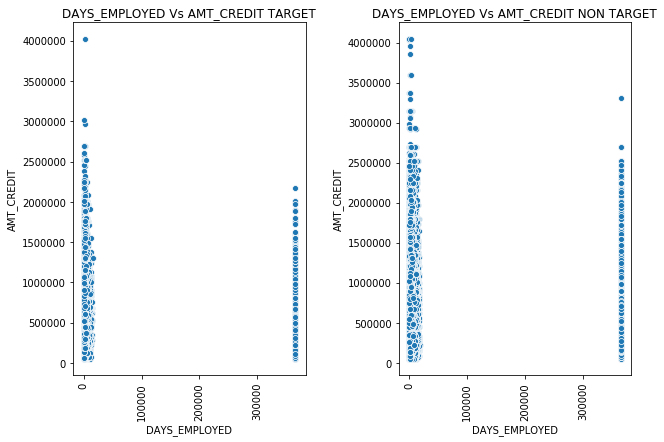

In [56]:
plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.scatterplot(x = appln_TARGET1['DAYS_EMPLOYED'],y = appln_TARGET1['AMT_CREDIT'])
plt.title("DAYS_EMPLOYED Vs AMT_CREDIT TARGET")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.scatterplot(x = appln_TARGET0['DAYS_EMPLOYED'],y = appln_TARGET0['AMT_CREDIT'])
plt.title("DAYS_EMPLOYED Vs AMT_CREDIT NON TARGET")
plt.xticks(rotation=90)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.]),
 <a list of 6 Text xticklabel objects>)

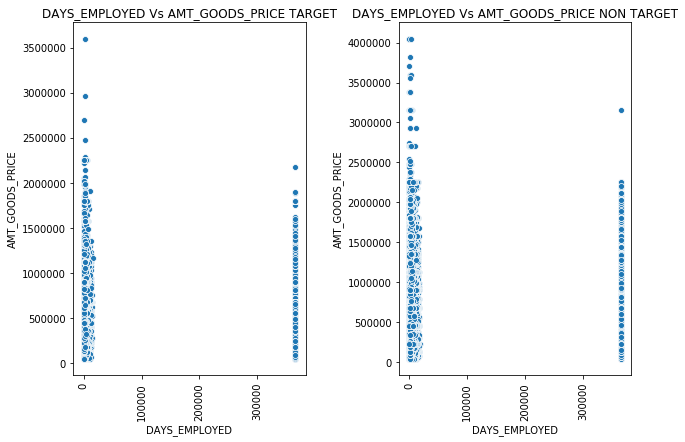

In [57]:
plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.scatterplot(x = appln_TARGET1['DAYS_EMPLOYED'],y = appln_TARGET1['AMT_GOODS_PRICE'])
plt.title("DAYS_EMPLOYED Vs AMT_GOODS_PRICE TARGET")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.scatterplot(x = appln_TARGET0['DAYS_EMPLOYED'],y = appln_TARGET0['AMT_GOODS_PRICE'])
plt.title("DAYS_EMPLOYED Vs AMT_GOODS_PRICE NON TARGET")
plt.xticks(rotation=90)

`Inferences:` Again, the pattern is same for both plots for bivariate continuous-continuous analysis, except with the no. of data points which are more in non-target than target.

### Bivariate Analysis: Continuous-Categorical (5 variables)

Text(0.5, 1.0, 'NON TARGET')

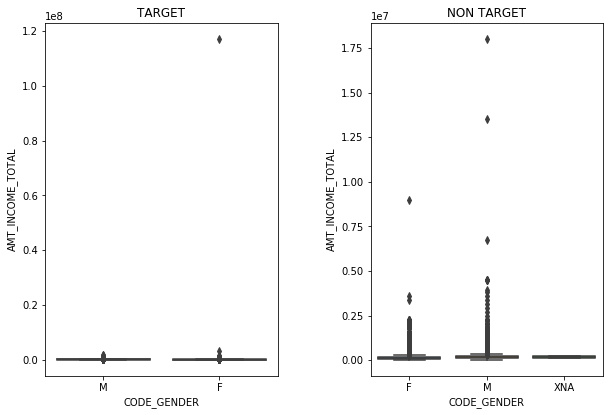

In [58]:
# CODE_GENDER vs AMT_INCOME_TOTAL

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.boxplot(x = 'CODE_GENDER',y = 'AMT_INCOME_TOTAL', data = appln_TARGET1)
plt.title("TARGET")


plt.subplot(1,2,2)
sns.boxplot(x = 'CODE_GENDER',y = 'AMT_INCOME_TOTAL', data = appln_TARGET0)
plt.title("NON TARGET")

`Inferences:` Outliers present in both plots. In TARGET, the outlier has to be removed and in NON TARGET, the four outliers can be removed and the outliers present as a group can handled using binning or capping methods. And the category XNA to be treated as missing value.

Text(0.5, 1.0, 'NON TARGET')

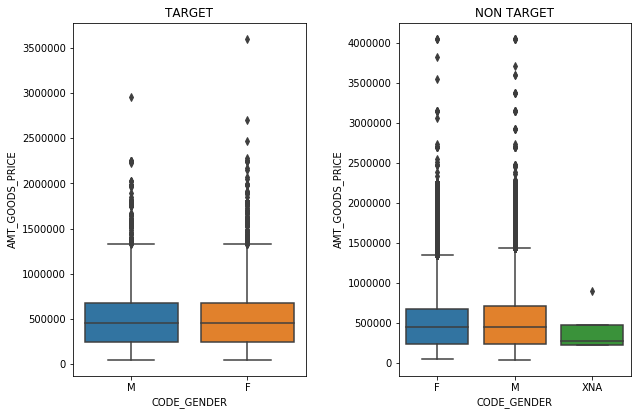

In [59]:
# CODE_GENDER vs AMT_GOODS_PRICE

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.boxplot(x = 'CODE_GENDER',y = 'AMT_GOODS_PRICE', data = appln_TARGET1)
plt.title("TARGET")


plt.subplot(1,2,2)
sns.boxplot(x = 'CODE_GENDER',y = 'AMT_GOODS_PRICE', data = appln_TARGET0)
plt.title("NON TARGET")


`Inferences:` The mean and IQR range is same for both TARGET and NON TARGET. Also, outliers to be treated using binning or capping methods and XNA to be considered as missing values.

Text(0.5, 1.0, ' NON TARGET')

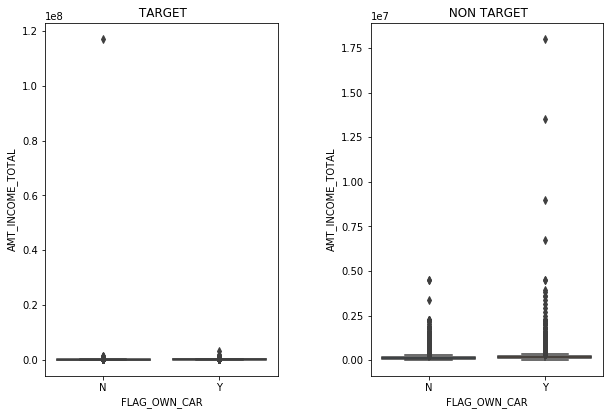

In [105]:
# FLAG_OWN_CAR vs AMT_INCOME_TOTAL

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.boxplot(x = 'FLAG_OWN_CAR',y = 'AMT_INCOME_TOTAL', data = appln_TARGET1)
plt.title(" TARGET")


plt.subplot(1,2,2)
sns.boxplot(x = 'FLAG_OWN_CAR',y = 'AMT_INCOME_TOTAL', data = appln_TARGET0)
plt.title(" NON TARGET")

`Inferences:`
1. In TARGET, for FLAG_OWN_CAR = N, there is a data point at an extreme end. A customer having very good salary but not owning a car? Either the AMT_INCOME_TOTAL or FLAG_OWN_CAR value might be wrong, in which case it can be treated as an outlier.
2. In NON TARGET, there are too many data points at the upper fence when compared to TARGET plot. These are outliers and should be treated either by binning or capping methods.

Text(0.5, 1.0, ' NON TARGET')

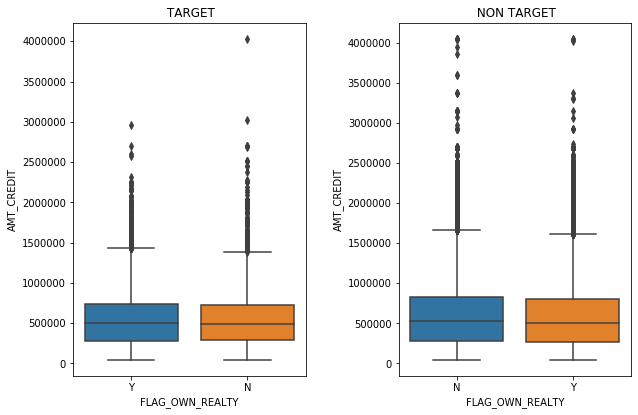

In [61]:
# FLAG_OWN_REALTY vs AMT_CREDIT

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.boxplot(x = 'FLAG_OWN_REALTY',y = 'AMT_CREDIT', data = appln_TARGET1)
plt.title(" TARGET")


plt.subplot(1,2,2)
sns.boxplot(x = 'FLAG_OWN_REALTY',y = 'AMT_CREDIT', data = appln_TARGET0)
plt.title(" NON TARGET")

`Inferences:` The mean and IQR is more for TARGET than NON TARGET. Outliers to be handled using capping method.

Text(0.5, 1.0, ' NON TARGET')

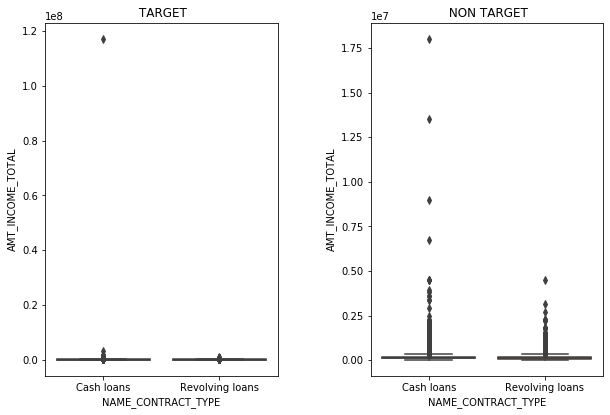

In [62]:
# NAME_CONTRACT_TYPE vs AMT_INCOME_TOTAL

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.boxplot(x = 'NAME_CONTRACT_TYPE',y = 'AMT_INCOME_TOTAL', data = appln_TARGET1)
plt.title(" TARGET")


plt.subplot(1,2,2)
sns.boxplot(x = 'NAME_CONTRACT_TYPE',y = 'AMT_INCOME_TOTAL', data = appln_TARGET0)
plt.title(" NON TARGET")

`Inferences:` Except with the outliers which can be handled with capping and extreme one to be deleted, Cash loans are more when compared to Revolving loans in both plots.

### Bivariate Analysis: Categorical-Categorical (5 variables)

Text(0.5, 1.0, ' NON TARGET')

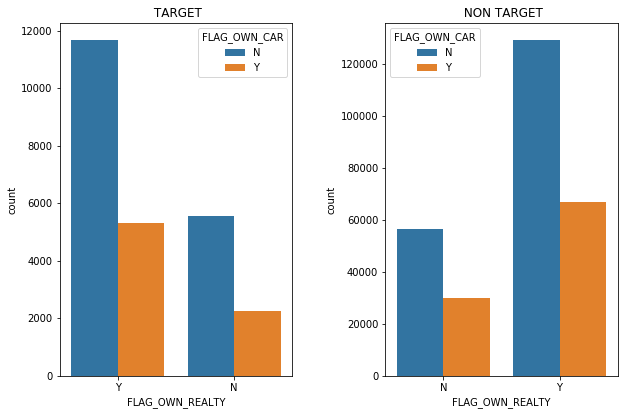

In [63]:
# FLAG_OWN_REALTY vs FLAG_OWN_CAR

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', hue = 'FLAG_OWN_CAR', data = appln_TARGET1)
plt.title(" TARGET")

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', hue = 'FLAG_OWN_CAR', data = appln_TARGET0)
plt.title(" NON TARGET")

`Inferences:` No much inferences can be drawn.

Text(0.5, 1.0, ' NON TARGET')

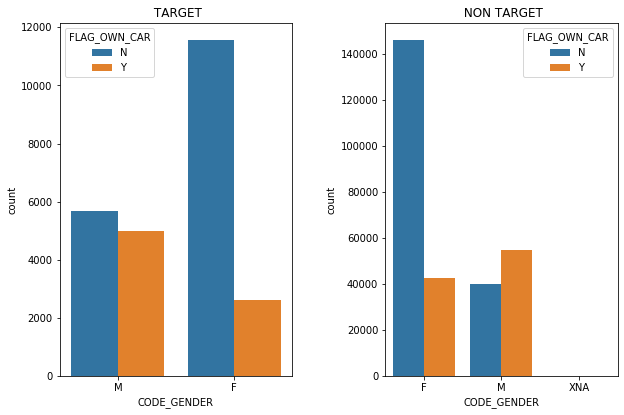

In [64]:
# CODE_GENDER vs FLAG_OWN_CAR

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', hue = 'FLAG_OWN_CAR', data = appln_TARGET1)
plt.title(" TARGET")


plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', hue = 'FLAG_OWN_CAR', data = appln_TARGET0)
plt.title(" NON TARGET")

`Inferences:` 
1. Irrespective of TARGET or NON TARGET, there are less no. of female customers who own car.
2. Whereas in Male CAtegory, the no. of customers who is owning car more in TARGET than NON TARGET plot.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

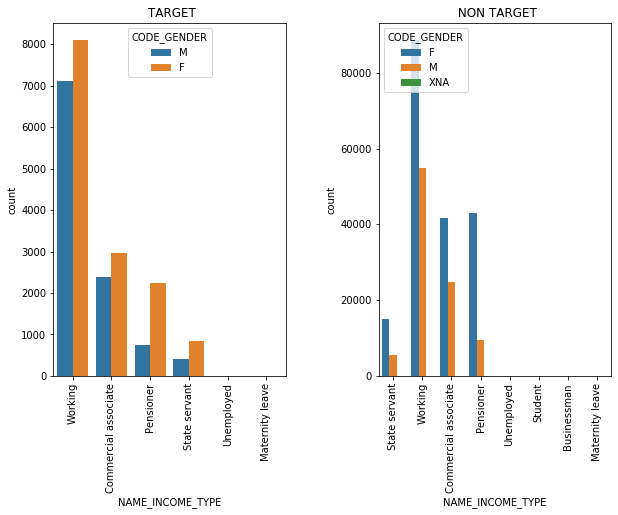

In [65]:
# NAME_INCOME_TYPE vs CODE_GENDER

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'CODE_GENDER', data = appln_TARGET1)
plt.title(" TARGET")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'CODE_GENDER', data = appln_TARGET0)
plt.title(" NON TARGET")
plt.xticks(rotation=90)

`Inferences:` It can be seen that female customer numbers are more in being employed irrespective of TARGET variable.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

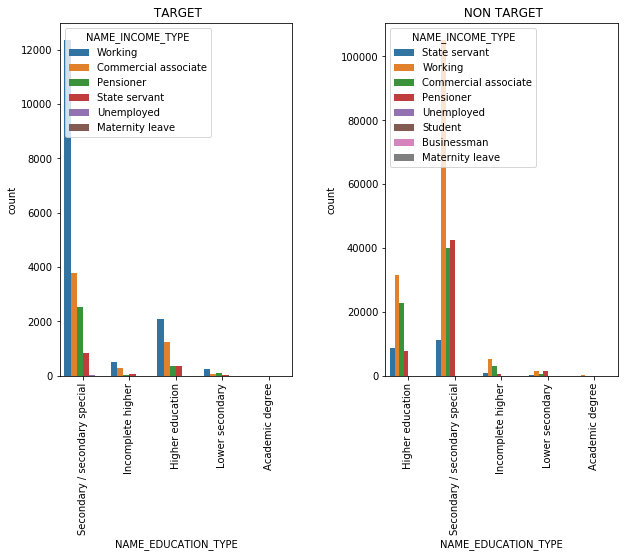

In [66]:
#NAME_EDUCATION_TYPE vs NAME_INCOME_TYPE

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_INCOME_TYPE', data = appln_TARGET1)
plt.title(" TARGET")
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_INCOME_TYPE', data = appln_TARGET0)
plt.title(" NON TARGET")
plt.xticks(rotation=90)

`Inferences:` The no. of customers who have 'Incomplete Higher' and 'Lower Secondary' education is more in TARGET than NON TARGET which in turn results in less no. of people getting employed or getting income.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

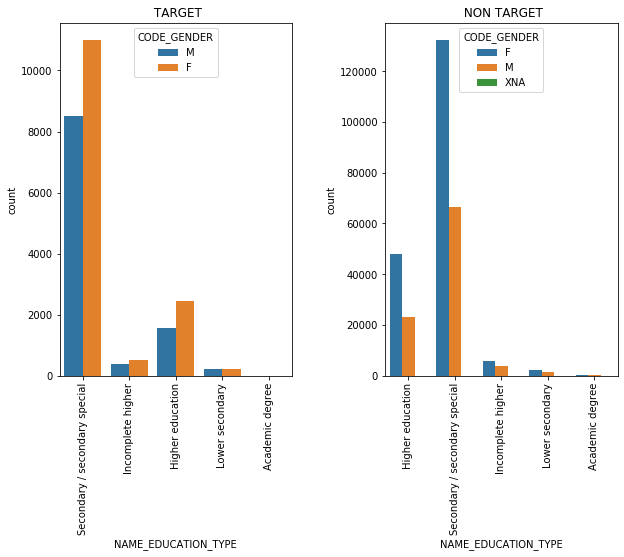

In [67]:
# NAME_EDUCATION_TYPE vs CODE_GENDER

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data = appln_TARGET1)
plt.title(" TARGET")
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data = appln_TARGET0)
plt.title(" NON TARGET")
plt.xticks(rotation=90)

`Inferences:` No much inferences from the plots. Only thing is the education level of Male customers number is less when compared to female customers.

In [68]:
# Reading previous application
prev_appln = pd.read_csv('previous_application.csv')
prev_appln

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,nan,607500.00,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,nan,112500.00,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,nan,450000.00,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,nan,337500.00,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.29,267295.50,311400.00,0.00,267295.50,WEDNESDAY,12,Y,1,0.00,nan,nan,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.00,low_normal,POS industry with interest,365243.00,-508.00,362.00,-358.00,-351.00,0.00
1670210,2357031,334635,Consumer loans,6622.02,87750.00,64291.50,29250.00,87750.00,TUESDAY,15,Y,1,0.34,nan,nan,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.00,middle,POS industry with interest,365243.00,-1604.00,-1274.00,-1304.00,-1297.00,0.00
1670211,2659632,249544,Consumer loans,11520.85,105237.00,102523.50,10525.50,105237.00,MONDAY,12,Y,1,0.10,nan,nan,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.00,low_normal,POS household with interest,365243.00,-1457.00,-1187.00,-1187.00,-1181.00,0.00
1670212,2785582,400317,Cash loans,18821.52,180000.00,191880.00,nan,180000.00,WEDNESDAY,9,Y,1,nan,nan,nan,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.00,low_normal,Cash X-Sell: low,365243.00,-1155.00,-825.00,-825.00,-817.00,1.00


In [69]:
#Checking data types in prev_appln

prev_appln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [119]:
#Merging the two files with SK_ID_CURRENT

merge_appln = pd.merge(new_appln, prev_appln, on='SK_ID_CURR', how = 'right')
merge_appln.shape

(1670214, 63)

In [122]:
#Dropping columns having more than 50% null values

merge_appln.drop(merge_appln.columns[merge_appln.isnull().sum()/merge_appln.shape[0]>0.5].tolist(), axis = 1, inplace =True)
merge_appln.shape

(1670214, 59)

In [72]:
merge_appln.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_BIRTH,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0.00,202500.00,Working,Secondary / secondary special,Single / not married,House / apartment,637.00,9461.00,406597.50,24700.50,351000.00,1,1,0,Laborers,1.00,Business Entity Type 3,2.00,2.00,2.00,2.00,1038818,Consumer loans,9251.77,179055.00,179055.00,179055.00,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.00,low_normal,POS other with interest,365243.00,-565.00,125.00,-25.00,-17.00,0.00
1,100003,0,Cash loans,F,N,N,0.00,270000.00,State servant,Higher education,Married,House / apartment,1188.00,16765.00,1293502.50,35698.50,1129500.00,1,1,0,Core staff,2.00,School,1.00,0.00,1.00,0.00,1810518,Cash loans,98356.99,900000.00,1035882.00,900000.00,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,low_normal,Cash X-Sell: low,365243.00,-716.00,-386.00,-536.00,-527.00,1.00
2,100003,0,Cash loans,F,N,N,0.00,270000.00,State servant,Higher education,Married,House / apartment,1188.00,16765.00,1293502.50,35698.50,1129500.00,1,1,0,Core staff,2.00,School,1.00,0.00,1.00,0.00,2636178,Consumer loans,64567.67,337500.00,348637.50,337500.00,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.00,middle,POS industry with interest,365243.00,-797.00,-647.00,-647.00,-639.00,0.00
3,100003,0,Cash loans,F,N,N,0.00,270000.00,State servant,Higher education,Married,House / apartment,1188.00,16765.00,1293502.50,35698.50,1129500.00,1,1,0,Core staff,2.00,School,1.00,0.00,1.00,0.00,2396755,Consumer loans,6737.31,68809.50,68053.50,68809.50,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.00,middle,POS household with interest,365243.00,-2310.00,-1980.00,-1980.00,-1976.00,1.00
4,100004,0,Revolving loans,M,Y,Y,0.00,67500.00,Working,Secondary / secondary special,Single / not married,House / apartment,225.00,19046.00,135000.00,6750.00,135000.00,1,1,0,Laborers,1.00,Government,0.00,0.00,0.00,0.00,1564014,Consumer loans,5357.25,24282.00,20106.00,24282.00,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.00,middle,POS mobile without interest,365243.00,-784.00,-694.00,-724.00,-714.00,0.00


In [123]:
merge_appln_TARGET1 = merge_appln[merge_appln['TARGET'] == 1]
merge_appln_TARGET1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_BIRTH,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0.00,202500.00,Working,Secondary / secondary special,Single / not married,House / apartment,637.00,9461.00,406597.50,24700.50,351000.00,1,1,0,Laborers,1.00,Business Entity Type 3,2.00,2.00,2.00,2.00,1038818,Consumer loans,9251.77,179055.00,179055.00,179055.00,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.00,low_normal,POS other with interest,365243.00,-565.00,125.00,-25.00,-17.00,0.00
161,100047,1,Cash loans,M,N,Y,0.00,202500.00,Commercial associate,Secondary / secondary special,Married,House / apartment,1262.00,17482.00,1193580.00,35028.00,855000.00,1,0,0,Laborers,2.00,Business Entity Type 3,0.00,0.00,0.00,0.00,1472630,Revolving loans,22500.00,0.00,450000.00,nan,SATURDAY,14,Y,1,XAP,Approved,-1172,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.00,XNA,Card X-Sell,365243.00,365243.00,365243.00,365243.00,365243.00,0.00
162,100047,1,Cash loans,M,N,Y,0.00,202500.00,Commercial associate,Secondary / secondary special,Married,House / apartment,1262.00,17482.00,1193580.00,35028.00,855000.00,1,0,0,Laborers,2.00,Business Entity Type 3,0.00,0.00,0.00,0.00,2426800,Cash loans,11117.70,157500.00,157500.00,157500.00,FRIDAY,15,Y,1,XNA,Approved,-1467,Cash through the bank,XAP,Family,Refreshed,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.00,high,Cash X-Sell: high,365243.00,-1437.00,-747.00,-1167.00,-1163.00,1.00
163,100047,1,Cash loans,M,N,Y,0.00,202500.00,Commercial associate,Secondary / secondary special,Married,House / apartment,1262.00,17482.00,1193580.00,35028.00,855000.00,1,0,0,Laborers,2.00,Business Entity Type 3,0.00,0.00,0.00,0.00,1021215,Cash loans,31674.87,675000.00,744498.00,675000.00,FRIDAY,11,Y,1,XNA,Refused,-1075,Cash through the bank,LIMIT,Family,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,36.00,low_normal,Cash Street: low,nan,nan,nan,nan,nan,nan
164,100047,1,Cash loans,M,N,Y,0.00,202500.00,Commercial associate,Secondary / secondary special,Married,House / apartment,1262.00,17482.00,1193580.00,35028.00,855000.00,1,0,0,Laborers,2.00,Business Entity Type 3,0.00,0.00,0.00,0.00,1035321,Consumer loans,4586.90,38205.00,34384.50,38205.00,SUNDAY,12,Y,1,XAP,Approved,-2634,Cash through the bank,XAP,"Spouse, partner",New,Photo / Cinema Equipment,POS,XNA,Country-wide,27,Connectivity,10.00,low_normal,POS mobile with interest,365243.00,-2601.00,-2331.00,-2331.00,-2326.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413559,456225,1,Cash loans,M,N,Y,0.00,225000.00,Working,Secondary / secondary special,Married,House / apartment,3147.00,20644.00,297000.00,19975.50,297000.00,1,1,0,Managers,2.00,Business Entity Type 3,0.00,0.00,0.00,0.00,2508396,Cash loans,17900.91,225000.00,254700.00,225000.00,MONDAY,17,Y,1,XNA,Approved,-94

In [124]:
merge_appln_TARGET0 = merge_appln[merge_appln['TARGET'] == 0]
merge_appln_TARGET0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_BIRTH,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1,100003,0,Cash loans,F,N,N,0.00,270000.00,State servant,Higher education,Married,House / apartment,1188.00,16765.00,1293502.50,35698.50,1129500.00,1,1,0,Core staff,2.00,School,1.00,0.00,1.00,0.00,1810518,Cash loans,98356.99,900000.00,1035882.00,900000.00,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,low_normal,Cash X-Sell: low,365243.00,-716.00,-386.00,-536.00,-527.00,1.00
2,100003,0,Cash loans,F,N,N,0.00,270000.00,State servant,Higher education,Married,House / apartment,1188.00,16765.00,1293502.50,35698.50,1129500.00,1,1,0,Core staff,2.00,School,1.00,0.00,1.00,0.00,2636178,Consumer loans,64567.67,337500.00,348637.50,337500.00,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.00,middle,POS industry with interest,365243.00,-797.00,-647.00,-647.00,-639.00,0.00
3,100003,0,Cash loans,F,N,N,0.00,270000.00,State servant,Higher education,Married,House / apartment,1188.00,16765.00,1293502.50,35698.50,1129500.00,1,1,0,Core staff,2.00,School,1.00,0.00,1.00,0.00,2396755,Consumer loans,6737.31,68809.50,68053.50,68809.50,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.00,middle,POS household with interest,365243.00,-2310.00,-1980.00,-1980.00,-1976.00,1.00
4,100004,0,Revolving loans,M,Y,Y,0.00,67500.00,Working,Secondary / secondary special,Single / not married,House / apartment,225.00,19046.00,135000.00,6750.00,135000.00,1,1,0,Laborers,1.00,Government,0.00,0.00,0.00,0.00,1564014,Consumer loans,5357.25,24282.00,20106.00,24282.00,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.00,middle,POS mobile without interest,365243.00,-784.00,-694.00,-724.00,-714.00,0.00
5,100006,0,Cash loans,F,N,Y,0.00,135000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,3039.00,19005.00,312682.50,29686.50,297000.00,1,0,0,Laborers,2.00,Business Entity Type 3,2.00,0.00,2.00,0.00,2078043,Cash loans,24246.00,675000.00,675000.00,675000.00,THURSDAY,15,Y,1,XNA,Approved,-181,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.00,low_normal,Cash X-Sell: low,365243.00,-151.00,1259.00,-151.00,-143.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0.00,157500.00,Commercial associate,Higher education,Married,House / apartment,1262.00,16856.00,675000.00,49117.50,675000.00,1,1,0,Laborers,2.00,Business Entity Type 3,0.00,0.00,0.00,0.00,2073384,Cash loans,16400.61,229500.00,254340.00,229500.00,THURSDAY,12,Y,1,XNA,Approved,-648,Cash through the bank,XAP,NaN,Repeater

In [125]:
#Correlation

corr = merge_appln_TARGET1.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace  = True)
corr_df['Correlation_abs'] = corr_df['Correlation'].abs()
corr_df.sort_values("Correlation_abs", ascending = False, inplace = True)
corr_df.head(10)

,Var1,Var2,Correlation,Correlation_abs
508,AMT_GOODS_PRICE_y,AMT_APPLICATION,1.00,1.00
328,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00,1.00
509,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.99,0.99
208,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.98,0.98
479,AMT_CREDIT_y,AMT_APPLICATION,0.98,0.98
809,DAYS_TERMINATION,DAYS_LAST_DUE,0.94,0.94
748,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.89,0.89
233,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89,0.89
358,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86,0.86
478,AMT_CREDIT_y,AMT_ANNUITY_y,0.84,0.84


In [127]:
corr = merge_appln_TARGET0.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace  = True)
corr_df['Correlation_abs'] = corr_df['Correlation'].abs()
corr_df.sort_values("Correlation_abs", ascending = False, inplace = True)
corr_df.head(10)

,Var1,Var2,Correlation,Correlation_abs
508,AMT_GOODS_PRICE_y,AMT_APPLICATION,1.00,1.00
328,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00,1.00
509,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.99,0.99
208,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.99,0.99
479,AMT_CREDIT_y,AMT_APPLICATION,0.98,0.98
809,DAYS_TERMINATION,DAYS_LAST_DUE,0.93,0.93
233,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88,0.88
358,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86,0.86
507,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,0.82,0.82
478,AMT_CREDIT_y,AMT_ANNUITY_y,0.82,0.82


`Inferences:` The correlation is more or less same for both dataframes after merging applicatio(shorlisted columns) with previous application file.

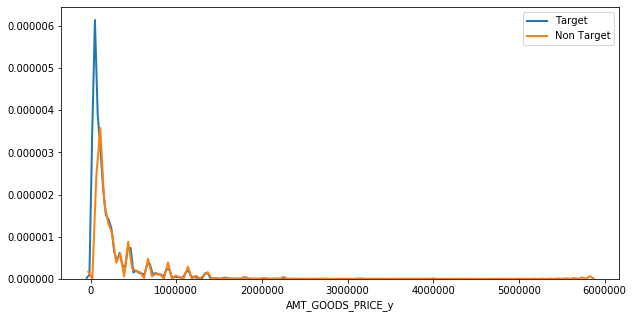

In [131]:
#analysis for AMT_GOODS_PRICE_y
plt.figure(figsize = [10,5])

sns.distplot(merge_appln_TARGET1['AMT_GOODS_PRICE_y'], hist= False , label = 'Target',kde_kws=dict(linewidth=2))
sns.distplot(merge_appln_TARGET0['AMT_GOODS_PRICE_y'], hist= False , label = 'Non Target',kde_kws=dict(linewidth=2))

`Inferences:` According to previous data (previous_application.csv) available, the AMT_GOODS_PRICE is less for most of the customers in TARGET when compared to NON TARGET customers.

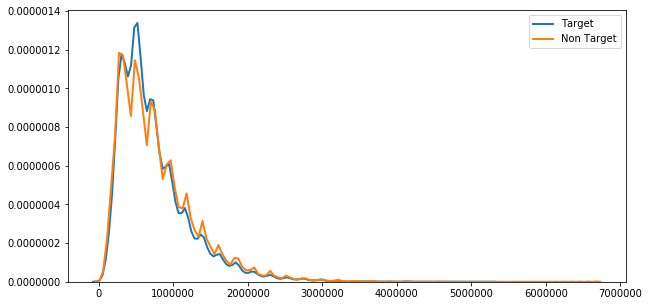

In [132]:
plt.figure(figsize = [10,5])
sns.distplot(merge_appln_TARGET1['AMT_GOODS_PRICE_x'] + merge_appln_TARGET1['AMT_GOODS_PRICE_y'] + merge_appln_TARGET1['AMT_ANNUITY_y'] , hist= False , label = 'Target',kde_kws=dict(linewidth=2))
sns.distplot(merge_appln_TARGET0['AMT_GOODS_PRICE_x'] + merge_appln_TARGET0['AMT_GOODS_PRICE_y'] +  merge_appln_TARGET0['AMT_ANNUITY_y'], hist= False , label = 'Non Target',kde_kws=dict(linewidth=2))

(array([0, 1]), <a list of 2 Text xticklabel objects>)

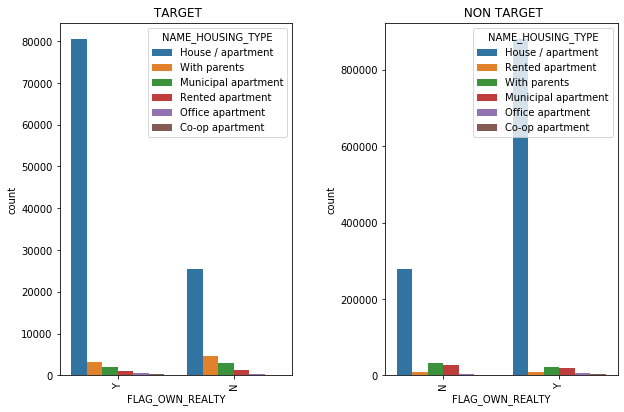

In [77]:
plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', hue = 'NAME_HOUSING_TYPE', data = merge_appln_TARGET1)
plt.title(" TARGET")
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', hue = 'NAME_HOUSING_TYPE', data = merge_appln_TARGET0)
plt.title(" NON TARGET")
plt.xticks(rotation=90)

`Inferences:` Nothing can be inferred as both pattern looks same.

Text(0.5, 1.0, ' NON TARGET')

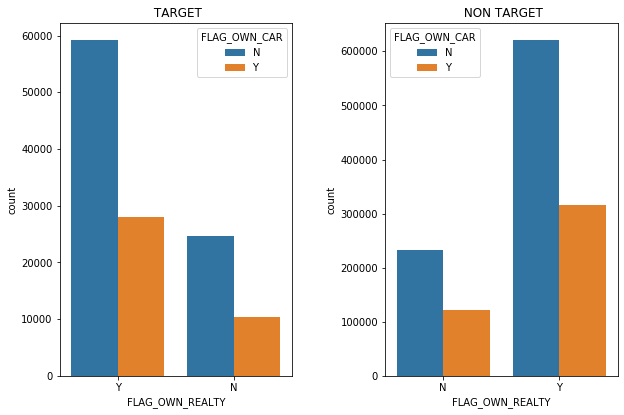

In [78]:
plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', hue = 'FLAG_OWN_CAR', data = merge_appln_TARGET1)
plt.title(" TARGET")


plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', hue = 'FLAG_OWN_CAR', data = merge_appln_TARGET0)
plt.title(" NON TARGET")

`Inferences:` Nothing can be inferred as both pattern looks same.

In [116]:
merge_appln_TARGET0.NAME_CONTRACT_STATUS.value_counts(normalize = True)

Approved       0.63
Canceled       0.18
Refused        0.17
Unused offer   0.02
Name: NAME_CONTRACT_STATUS, dtype: float64

In [117]:
merge_appln_TARGET1.NAME_CONTRACT_STATUS.value_counts(normalize = True)

Approved       0.55
Refused        0.24
Canceled       0.19
Unused offer   0.02
Name: NAME_CONTRACT_STATUS, dtype: float64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

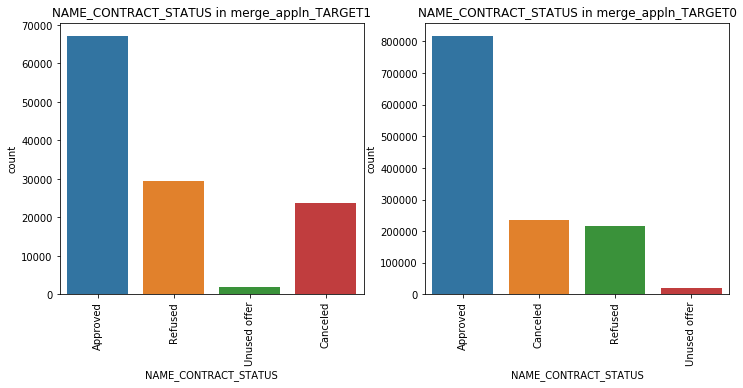

In [136]:
# NAME_CONTRACT_STATUS
plt.figure(figsize = [12,5])
plt.subplot(1,2,1)
sns.countplot(merge_appln_TARGET1.NAME_CONTRACT_STATUS)
plt.title('NAME_CONTRACT_STATUS in merge_appln_TARGET1')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(merge_appln_TARGET0.NAME_CONTRACT_STATUS)
plt.title('NAME_CONTRACT_STATUS in merge_appln_TARGET0')
plt.xticks(rotation=90)

`Inferences:` 
1. The percentage of refusal is more for TARGET as the requirements is not met by the client when compared to NON TARGET customers.
2. The percentage of approval is more in NON TARGET when compared to TARGET customers.

Text(0.5, 1.0, 'NON TARGET')

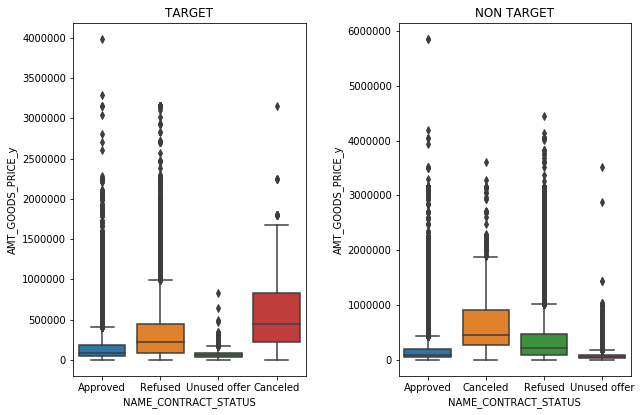

In [112]:
#NAME_CONTRACT_STATUS vs AMT_GOODS_PRICE_y

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.boxplot(x = 'NAME_CONTRACT_STATUS',y = 'AMT_GOODS_PRICE_y', data = merge_appln_TARGET1)
plt.title("TARGET")


plt.subplot(1,2,2)
sns.boxplot(x = 'NAME_CONTRACT_STATUS',y = 'AMT_GOODS_PRICE_y', data = merge_appln_TARGET0)
plt.title("NON TARGET")

`Inferences:` The IQR of 'Canceled' application as well as 'Refused' application is more in TARGET plot when compared to NON TARGET customers.

Text(0.5, 1.0, 'NON TARGET')

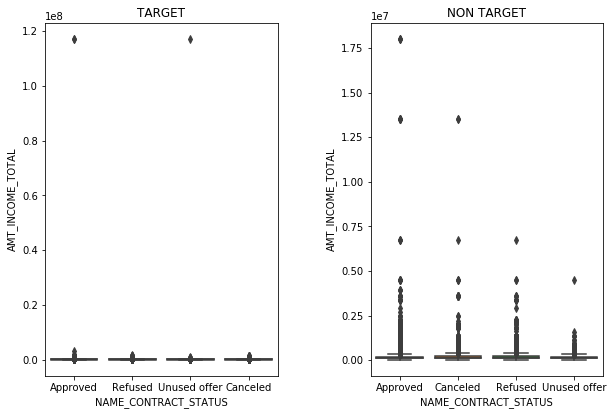

In [137]:
#NAME_CONTRACT_STATUS vs AMT_INCOME_TOTAL

plt.figure(figsize = [10,5])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

plt.subplot(1,2,1)
sns.boxplot(x = 'NAME_CONTRACT_STATUS',y = 'AMT_INCOME_TOTAL', data = merge_appln_TARGET1)
plt.title("TARGET")


plt.subplot(1,2,2)
sns.boxplot(x = 'NAME_CONTRACT_STATUS',y = 'AMT_INCOME_TOTAL', data = merge_appln_TARGET0)
plt.title("NON TARGET")

`Inferences:` The income for NON TARGET customers is more when compared to TARGET customers.

`Conclusion:`

1. With all these analysis it can be inferred that the following columns might be the driving factor for loan default:
    - AMT_INCOME_TOTAL
    - AMT_ANNUITY
    - AMT_CREDIT
    - NAME_EDUCATION_TYPE
    - NAME_INCOME_TYPE 
    
2. These factors are related to each other.
    - AMT_INCOME_TOTAL is dependent on NAME_INCOME_TYPE which is in turn dependent on NAME_EDUCATION_TYPE.
    - AMT_CREDIT is related to AMT_INCOME_TOTAL.
    - AMT_ANNUITY is dependent on AMT_CREDIT.
    
3. Considering the plots NAME_CONTRACT_STATUS vs AMT_GOODS_PRICE_y and NAME_CONTRACT_STATUS vs AMT_INCOME_TOTAL, it can be infered that, to decrease the `credit loss` for NON TARGET customers, the IQR for 'Refused' application can be minimised with certain measures that can be taken by the bank as the total income of NON TARGET customers are fairly good when compared to TARGET csutomers thereby increasing the 'Approved' application count.

4. Also, with the same parameter i.e., AMT_INCOME_TOTAL, the `interest loss` needs to be minimised for TARGET customers. Even though the TARGET customers have fair price for consumer goods, it is not sufficient for paying the loan amount.